# Previsione prezzi Volkswagen usate
**Esame in Programmazione di Applicazioni Data Intensive**  

Alunno Lorenzo Morelli
`lorenzo.morelli@studio.unibo.it`

## Setup

- Importiamo i package necessari

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Caricamento dei dati

- Il dataset viene reperito alla pagina https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes
- L'utente che ha caricato il dataset ha diviso i file in base alla marca del veicolo. In questo primo approccio andremo ad analizzare solo i modelli di auto della casa **Volkswagen**.
- Li troviamo nel file **vw.csv**.
- Tutti i dataset scaricati da Kaggle sono stati caricati sulla repo di bitbucket nella sezione **Download**.

In [2]:
import os.path
from urllib.request import urlretrieve
if not os.path.exists("vw.csv"):
    urlretrieve("https://bitbucket.org/lori_more/esamedataintensive/downloads/vw.csv", "vw.csv")


- Carichiamo con pandas il dataset

In [3]:
auto = pd.read_csv("vw.csv")

In [4]:
auto.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6         2.0
1   T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6         2.0
2   T-Roc  2019  20000       Manual     7414   Diesel  145  50.4         2.0
3   T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5         2.0
4   T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8         1.5

Nel dataset scaricato si nota che nel nome del modello c'è uno spazio che è molto scomodo e perciò lo rimuovo.

In [5]:
auto["model"] = auto["model"].str.replace(" ", "")
auto.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0  T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6         2.0
1  T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6         2.0
2  T-Roc  2019  20000       Manual     7414   Diesel  145  50.4         2.0
3  T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5         2.0
4  T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8         1.5

**Lista delle variabili**

---

- MODEL: modello di auto
- YEAR: anno di immatricolazione
- **PRICE: prezzo di vendita**
  - vogliamo stimare il valore di questa variabile (la valuta dei prezzi sono le sterline)
- TRANSMISSION: tipo di trasmissione
- MILEAGE: chilometraccio in Miglia
- FUELTYPE: tipo di carburante
- TAX: tassa di vendita
- MPG: consumo in miglia per gallone (miles per gallons)
- ENGINESIZE: dimensioni del motore diviso 1000 (es. 2000 cc -> 2.0)

In [6]:
auto.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Columns: 9 entries, model to engineSize
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4 MB


Come vediamo il dataset presenta 9 feature di cui 3 di tipo object:
1. il modello (model)
2. la trasmissione (transmission)
3. il tipo di carburante (fuelType)

Ricarichiamo quindi il dataset in modo da gestire questi 3 dati come categorici.


In [7]:
categorical = ["model", "transmission", "fuelType"]
auto = pd.read_csv("vw.csv", dtype={x:"category" for x in categorical})
auto.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Columns: 9 entries, model to engineSize
dtypes: category(3), float64(2), int64(4)
memory usage: 758.6 KB


Vediamo come ora lo spazio in memoria sia meno di 1/3 rispetto a prima.

Dato che ho ricaricato il file vw.csv devo rimuovere nuovamente lo spazio.

In [8]:
auto["model"] = auto["model"].str.replace(" ", "")

In [9]:
auto.head()

model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0  T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6         2.0
1  T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6         2.0
2  T-Roc  2019  20000       Manual     7414   Diesel  145  50.4         2.0
3  T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5         2.0
4  T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8         1.5

##Analisi Generale dei dati

Andiamo ad analizzare il dataset per prendere coscienza del dominio applicativo.

In [10]:
for x in ["model", "transmission", "fuelType"]:
    print(x+":  \t"+ str(auto[x].nunique()));

model:  	27
transmission:  	3
fuelType:  	4


Vediamo come per la casa Volkswagen abbiamo:
- 27 modelli di auto diversi
- 3 tipi di transmissione
- 4 tipi di carburanti

Creo una funzione per rappresentare con un grafico a barre le feature più presenti.

In [11]:
def plot_bar(feature, n, title):
    auto[feature].value_counts()[:n].plot.bar(figsize=(15, 4))
    plt.axes().set_title(title);
    plt.show()

Vediamo graficamente i 10 modelli di auto più frequenti

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


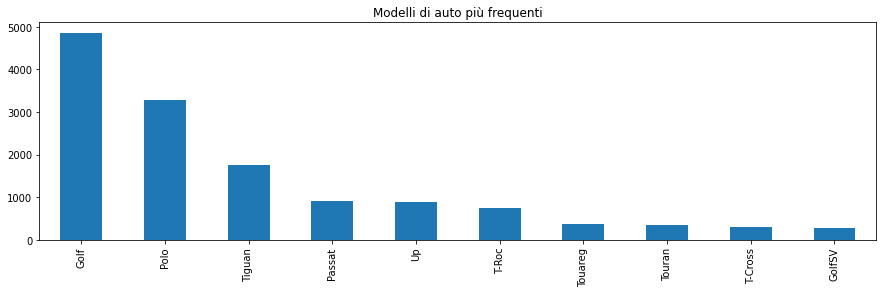

In [13]:
plot_bar("model", 10, "Modelli di auto più frequenti")

Vediamo come i modelli di punta di Volkswagen (Golf e Polo) siano ordini di grandezza superiori rispetto agli altri modelli di auto.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


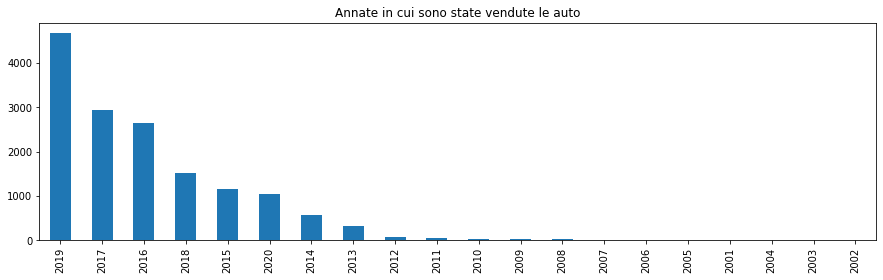

In [14]:
plot_bar("year", 20, "Annate in cui sono state vendute le auto")

- Possiamo osservare che la maggior parte delle auto sono state vendute entro i primi 7/8 anni dalla data di acquisto.
- Questo comporterà che il nostro modello potrebbe non essere molto affidabile su auto troppo vecchie dato che non abbiamo molti dati su cui allenarlo.

Esploriamo ora la correlazione di alcune feature con il prezzo di vendita

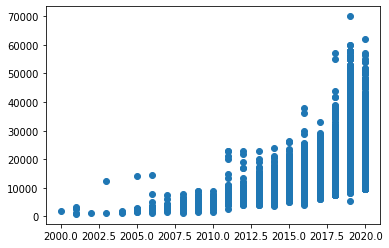

In [15]:
plt.scatter(auto["year"], auto["price"])

Dal grafico possiamo vedere molto bene che c'è un forte correlazione direttamente proporzionale tra l'annata e il prezzo.

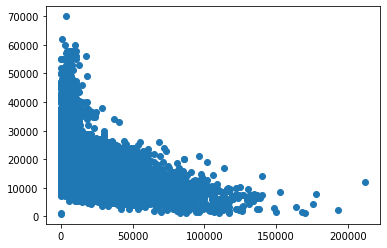

In [16]:
plt.scatter(auto["mileage"], auto["price"])

Si nota molto bene invece che il chilometraggio è correlato rispetto al prezzo in maniera opposta (inversamente proporzionale).

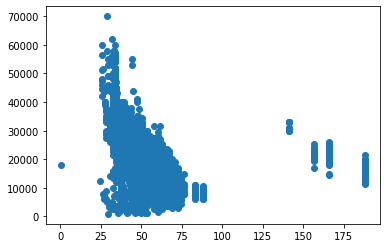

In [17]:
plt.scatter(auto["mpg"], auto["price"])

A differenza del chilometraggio e dall'annata i consumi non sembrano influire particolarmente sui prezzi.

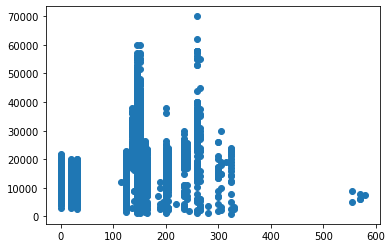

In [18]:
plt.scatter(auto["tax"], auto["price"])

Stessa cosa per quanto riguarda la tassa di vendita.

Vediamo infine alcune statistiche sui prezzi

In [19]:
auto["price"].describe()

count    15157.000000
mean     16838.952365
std       7755.015206
min        899.000000
25%      10990.000000
50%      15497.000000
75%      20998.000000
max      69994.000000
Name: price, dtype: float64

Notiamo come c'è un enorme margine tra il prezzo massimo e minimo.

##Preparazione dei dati

Andando a guardare i vari modelli notiamo subito come alcuni di questi siano molto poco comuni (Es. il modello FOX è presente solo 4 volte)

In [21]:
auto["model"].value_counts().tail()

CaddyLife    8
Eos          7
Caddy        6
CaddyMaxi    4
Fox          4
Name: model, dtype: int64

Si sceglie quindi di rimuovere tutti i modelli presenti meno di 100 volte nel dataset ai fini di rendere il modello più leggero ed evitare l'overfitting

In [22]:
auto_to_remove = auto["model"].value_counts() < 100
auto_to_remove = auto_to_remove[auto_to_remove].index.values

auto_reduced = auto[~auto["model"].isin(auto_to_remove)]
auto_reduced["model"].value_counts()

Golf         4863
Polo         3287
Tiguan       1765
Passat        915
Up            884
T-Roc         733
Touareg       363
Touran        352
T-Cross       300
GolfSV        268
Sharan        260
Arteon        248
Scirocco      242
Amarok        111
Caravelle     101
Name: model, dtype: int64

Si sceglie anche di rimuovere le feature TAX e MPG dal dataset in quanto non particolarmente rilevanti al fine di determinare il prezzo di vendita.

In [23]:
auto_reduced = auto_reduced.drop(columns=["tax", "mpg"])

In [24]:
auto_reduced.head()

model  year  price transmission  mileage fuelType  engineSize
0  T-Roc  2019  25000    Automatic    13904   Diesel         2.0
1  T-Roc  2019  26883    Automatic     4562   Diesel         2.0
2  T-Roc  2019  20000       Manual     7414   Diesel         2.0
3  T-Roc  2019  33492    Automatic     4825   Petrol         2.0
4  T-Roc  2019  22900    Semi-Auto     6500   Petrol         1.5

**Binarizzazione dei modelli di auto**
- Il nostro dataset è formato da 3 colonne categoriche:
  1. model
  2. transmission
  3. fuelType
- E da 3 colonne numeriche (prezzo escluso):
  1. year
  2. mileage
  3. engineSize

In [25]:
categorical_vars = ["model", "transmission", "fuelType"]
numeric_vars = ["year", "mileage", "engineSize"]

Utilizziamo quindi una tecnica di pre-processing sui dati:
- Per convertire feature categoriche in valori numerici (OneHotEncoder)
- E per normalizzare le feature numeriche in modo da compensare le scale dei valori (StandardScaler)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

preprocessor = ColumnTransformer([
        ("numeric", StandardScaler(), numeric_vars),
        ("categorical", OneHotEncoder(sparse=False, handle_unknown = "ignore"), categorical_vars)
])

- Abbiamo così il nostro pre-processore pronto all'uso.

**Resoconto**
- Abbiamo gestito le variabili *categoriche* tramite la binarizzazione effettuata dal OneHotEncoder
- Abbiamo gestito le variabili *numeriche* applicando uno scaler, questo perché feature come i prezzi e i chilometri hanno scale molto diverse tra loro.

**Divisione tra training set e validation set**

In [28]:
y = auto_reduced["price"]
X = auto_reduced.drop(columns=["price"])

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/3, random_state=50)

Abbiamo ora tutto ciò che ci serve per poter creare dei modelli di regressione.

##Creazione dei modelli
Andreamo a creare 4 modelli diversi di regressione:
  1. Regressione Lineare
  2. Regressione con Lasso
  3. Regressione con Ridge
  4. Alberi Decisionali

**Regressione Lineare**

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model_lin = Pipeline([
    ("preproc", preprocessor),
    ("regr", LinearRegression())
])
model_lin.fit(X_train, y_train)

kf = KFold(3, shuffle=True, random_state=40)
scores = cross_val_score(model_lin, X_val , y_val, cv=kf)
scores.mean()

0.8777418636823873

**Regressione con Lasso**

In [30]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

model_lasso = Pipeline([
    ("preproc", preprocessor),
    ("regr", Lasso())
])
grid = {
    "regr__alpha": [1, 10, 50]
    }
gs_lasso = GridSearchCV(model_lasso, param_grid=grid, cv=kf)
gs_lasso.fit(X_train, y_train)

sel = ["rank_test_score","mean_test_score","params"]
pd.DataFrame(gs_lasso.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score               params
0                1         0.874445   {'regr__alpha': 1}
1                2         0.873280  {'regr__alpha': 10}
2                3         0.848000  {'regr__alpha': 50}

Applicando la Lasso con un alpha abbastanza grande (10) si ottiene comunque un risultato molto buono.

Verifichiamo quante feature si azzerano.

In [31]:
model_lasso_2 = Pipeline([
    ("preproc", preprocessor),
    ("regr", Lasso(alpha=10))
])
model_lasso_2.fit(X_train, y_train)
model_lasso_2.score(X_val, y_val)

0.8766810187585408

In [32]:
all_features = pd.Series(model_lasso_2.named_steps["regr"].coef_).value_counts()
print("Feature totali: " + str(all_features.sum()))
print("Feature rimosse: " + str(all_features[all_features.index == 0].values[0]))

Feature totali: 25
Feature rimosse: 7


Otteniamo un modello con 7 feature in meno ma comunque affidabile.

**Regressione Ridge**

In [33]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([
    ("preproc", preprocessor),
    ("regr", Ridge())
])

grid = {
    "regr__alpha": [1, 10, 50]
}
gs_ridge = GridSearchCV(model_ridge, param_grid=grid, cv=kf)
gs_ridge.fit(X_train, y_train)

pd.DataFrame(gs_ridge.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score               params
0                1         0.874421   {'regr__alpha': 1}
1                2         0.872948  {'regr__alpha': 10}
2                3         0.860556  {'regr__alpha': 50}

- La regressione Ridge sembra mantenere punteggi molto simili al cambiare di alpha.

- Si sceglie di tenere come regressione ridge di riferimento quella con alpha pari a 10

In [34]:
model_ridge_2 = Pipeline([
    ("preproc", preprocessor),
    ("regr", Ridge(alpha=10))
])

model_ridge_2.fit(X_train, y_train)
model_ridge_2.score(X_val, y_val)

0.8768138993335441

In [35]:
all_features = pd.Series(model_ridge_2.named_steps["regr"].coef_).value_counts()
print("Feature totali: " + str(all_features.sum()))
print("Feature rimosse: " + str(all_features[all_features.index == 0].sum()))

Feature totali: 25
Feature rimosse: 0


Considerazioni finali:
- La Ridge a differenza di Lasso azzera più difficilmente le varie feature, questo permette di alleggerire il modello mantenendo comunque in considerazione feature meno rilevanti.
- Nonostante ciò i punteggi tra Ridge e Lasso sono più o meno equivalenti.
- Se si provasse a aggiungere feature polinomiali il tempo di fitting del modello sarebbe esagerato.
- Provando anche ad utilizzare il kernel trick i tempi sono comunque alti per via del numero di istanze di questo dataset molto elevato.
- Proviamo con un cambio di rotta, una regressione con Alberi Decisionali

**Alberi Decisionali**

In [36]:
from sklearn.tree import DecisionTreeRegressor

model_tree = Pipeline([
    ("preproc", preprocessor),
    ("regr",  DecisionTreeRegressor(random_state=50))
])
grid = {
    "regr__max_depth": [5, 10, 20, None],
    "regr__min_samples_split": [2, 0.02, 0.05, 0.1]
}

gs_tree = GridSearchCV(model_tree, grid, cv=kf)
gs_tree.fit(X_train, y_train)
pd.DataFrame(gs_tree.cv_results_).sort_values("mean_test_score", ascending=False)[sel].head()

rank_test_score  ...                                             params
4                 1  ...  {'regr__max_depth': 10, 'regr__min_samples_spl...
9                 2  ...  {'regr__max_depth': 20, 'regr__min_samples_spl...
13                2  ...  {'regr__max_depth': None, 'regr__min_samples_s...
5                 4  ...  {'regr__max_depth': 10, 'regr__min_samples_spl...
8                 5  ...  {'regr__max_depth': 20, 'regr__min_samples_spl...

[5 rows x 3 columns]

In [37]:
gs_tree.best_params_

{'regr__max_depth': 10, 'regr__min_samples_split': 2}

Il modello con Alberi Decisionali sembra molto promettente.

Andremo poi ad analizzarlo più nello specifico.

##Valutazione dei modelli
Andiamo ora a valutare con più accortezze i modelli migliori:
*   Modello Lineare
*   Modello con Ridge
*   Modello con Alberi Decisionali

Creiamo prima di tutto una funzione (print_eval) per visualizzare:
1. Errore quadratico medio
2. Errore relativo
3. Coefficiente R-quadro

In [38]:
# importo MSE e R²
from sklearn.metrics import mean_squared_error, r2_score

# definisco funzione per errore relativo
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

# funzione per calcolare e stampare tutte e tre
def print_eval(X, y, model):
    preds = model.predict(X)
    print("   Mean squared error: {:.5}".format(mean_squared_error(y, preds)))
    print("       Relative error: {:.5%}".format(relative_error(y, preds)))
    print("R-squared coefficient: {:.5}".format(r2_score(y, preds)))

Visualizziamo quindi la valutazione dei modelli sia sul training set, sia sul validation set

In [47]:
print("Modello Lineare - Train")
print_eval(X_train, y_train, model_lin)
print("--------------------------------")
print("Modello Lineare - Val")
print_eval(X_val, y_val, model_lin)
print("================================")
print("Modello Ridge - Train")
print_eval(X_train, y_train, model_ridge_2)
print("--------------------------------")
print("Modello Ridge - Val")
print_eval(X_val, y_val, model_ridge_2)
print("================================")
print("Modello Alberi - Train")
print_eval(X_train, y_train, gs_tree)
print("--------------------------------")
print("Modello Alberi - Val")
print_eval(X_val, y_val, gs_tree)

Modello Lineare - Train
   Mean squared error: 7.2099e+06
       Relative error: 13.35001%
R-squared coefficient: 0.87536
--------------------------------
Modello Lineare - Val
   Mean squared error: 7.1174e+06
       Relative error: 13.16792%
R-squared coefficient: 0.87814
Modello Ridge - Train
   Mean squared error: 7.2508e+06
       Relative error: 13.36586%
R-squared coefficient: 0.87465
--------------------------------
Modello Ridge - Val
   Mean squared error: 7.1948e+06
       Relative error: 13.19068%
R-squared coefficient: 0.87681
Modello Alberi - Train
   Mean squared error: 3.2372e+06
       Relative error: 7.36178%
R-squared coefficient: 0.94404
--------------------------------
Modello Alberi - Val
   Mean squared error: 4.8951e+06
       Relative error: 9.02590%
R-squared coefficient: 0.91619


##Il modello migliore
Il modello che ha il maggiore coefficiente R-quadro e il minore errore relativo è quello basato sugli Alberi Decisionali

Come vediamo il modello con Alberi Decisionali pecca un po' quando viene fatto il test sul validation_set, ma comunque ottiene dei buoni risultati.

In [41]:
gs_tree.best_estimator_.named_steps["regr"].get_depth()

10

In [42]:
gs_tree.best_estimator_.named_steps["regr"].get_n_leaves()

668

La profondità del nostro modello è 10, con tale profondità otteniamo un albero con 668 foglie.

Analizziamo ora come ragiona il modello.
- Come prima cosa andiamo ad estrarre le feature categoriche e numeriche

In [43]:
cat_feature_names = (gs_tree.best_estimator_.named_steps['preproc']
                      .named_transformers_['categorical']
                      .get_feature_names(input_features=categorical_vars))
tree_feature_names = np.concatenate(
   [cat_feature_names, numeric_vars])

- Andiamo poi a mostrare i nodi principali dell'albero

In [44]:
from sklearn.tree import export_text
print(export_text(gs_tree.best_estimator_.named_steps["regr"], feature_names=list(tree_feature_names), max_depth=3))

|--- model_Amarok <= 0.11
|   |--- model_Caravelle <= 0.23
|   |   |--- model_Amarok <= -0.88
|   |   |   |--- model_Amarok <= -1.88
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_Amarok >  -1.88
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- model_Amarok >  -0.88
|   |   |   |--- model_Caravelle <= -0.64
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_Caravelle >  -0.64
|   |   |   |   |--- truncated branch of depth 7
|   |--- model_Caravelle >  0.23
|   |   |--- model_Arteon <= 1.34
|   |   |   |--- model_Amarok <= -0.39
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_Amarok >  -0.39
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- model_Arteon >  1.34
|   |   |   |--- model_Amarok <= -3.37
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_Amarok >  -3.37
|   |   |   |   |--- truncated branch of depth 7
|--- model_Amarok >  0.11
|   |--- model_Caravelle <= 0.66
|

- Si può facilmente notare come il modello prima di tutto vada ad identificare il modello di auto.
- E' un comportamento che ci si può aspettare dato che prima di tutto per poter identificare il prezzo di un auto bisogna sapere di che modello di auto stiamo parlando.

**Interpretazione dei coefficienti**
- Per capire le differenze tra questo modello e gli altri si effettua l'analisi dei coefficienti.
- Si va quindi ad analizzare il modello più semplice, quello lineare.
- Andiamo quindi ad interpretare tramite l'analisi dei coefficienti degli iperpiani la conoscenza appresa dal modello.

In [45]:
feature_names = (model_lin.named_steps['preproc']
                      .named_transformers_['categorical']
                      .get_feature_names(input_features=categorical_vars))
feature_names = np.concatenate(
    [feature_names, numeric_vars])

coefs = pd.DataFrame(
    model_lin.named_steps['regr'].coef_,
    columns=['Coefficienti'],
    index=feature_names
)

coefs

Coefficienti
model_Amarok             2654.936921
model_Arteon            -1703.791891
model_Caravelle          3587.572818
model_Golf                -90.738261
model_GolfSV             1110.995853
model_Passat            17007.343020
model_Polo              -2431.795466
model_Scirocco          -3940.278628
model_Sharan            -2123.558835
model_T-Cross           -4471.300614
model_T-Roc             -3545.778563
model_Tiguan              109.680466
model_Touareg             -27.779342
model_Touran              623.235658
model_Up                  819.213171
transmission_Automatic   3363.896272
transmission_Manual       222.754148
transmission_Semi-Auto  -6625.888880
fuelType_Diesel           651.563715
fuelType_Hybrid         -1242.786563
fuelType_Other            591.222848
fuelType_Petrol         -3634.411198
year                     5237.708332
mileage                  -946.075039
engineSize               -657.222095

Facciamo alcune considerazioni:
- Alcuni dei coefficienti sono ben interpretabili, come la grande influenza positiva dell'annata del veicolo sul prezzo.
- Giustamente ci si aspettava anche una influenza negativa sul prezzo da parte del chilometraggio (anche se in maniera più preponderante).
- Si nota inoltre che sembrano essere caratteristiche rilevanti secondo il modello la tipologia di carburante e il tipo di trasmissione.
- Non mi è invece molto chiaro come mai la dimensione del motore possa influenzare negativamente il prezzo dato le auto con motori piccoli sono in genere più economiche.
- Infine non è facile interpretare il peso che il modello da al modello di auto. Forse tali pesi rispecchiano quello che è il mantenimento del prezzo dopo l'acquisto. Cioè il valore(prezzo) che mantiene una vettura di seconda mano.

#Previsione prezzi con più marchi di auto usate
- Prepariamo i dati per creare un dataset costituito da più brand di auto.
- Il setup è identico a quello precedente quindi evito questa sezione.

##Caricamento dei dati
Scarichiamo tutti i dataset reperibili all'url indicato in precedenza cambiando semplicemente il nome.

In [48]:
all_cars_model_dataset = ["vw.csv", "toyota.csv", "skoda.csv", "opel.csv", "merc.csv", "hyundi.csv", "ford.csv", "bmw.csv", "audi.csv"]
for car_model in all_cars_model_dataset:
    if not os.path.exists(car_model):
        urlretrieve("https://bitbucket.org/lori_more/esamedataintensive/downloads/" + car_model, car_model)

- Come prima cosa unisco i dataset creandone uno unico.

In [49]:
all_auto = pd.concat(pd.read_csv(f) for f in all_cars_model_dataset)

- Come all'inizio rimuovo lo spazio iniziale dal nome del modello.

In [50]:
all_auto["model"] = all_auto["model"].str.replace(" ", "")

- E sempre come prima rimuovo la colonna delle tasse e del consumo.

In [51]:
all_auto = all_auto.drop(columns=["tax", "mpg", "tax(£)"])

In [52]:
all_auto.tail()

model  year  price transmission  mileage fuelType  engineSize
10663    A3  2020  16999       Manual     4018   Petrol         1.0
10664    A3  2020  16999       Manual     1978   Petrol         1.0
10665    A3  2020  17199       Manual      609   Petrol         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol         1.4
10667    Q3  2016  15999       Manual    11855   Petrol         1.4

Infine vado a filtrare le auto con annate comprese tra il 2000 e il 2020. Questo ai fini di diminuire l'overfit.

In [53]:
all_auto = all_auto[all_auto["year"] < 2020]
all_auto = all_auto[all_auto["year"] > 2000]

##Analisi Generale dei dati

Andiamo ad analizzare nuovamente i dati per prendere coscienza del nuovo dominio applicativo.

In [54]:
for x in ["model", "transmission", "fuelType"]:
    print(x+":  \t"+ str(all_auto[x].nunique()));

model:  	192
transmission:  	4
fuelType:  	5


Vediamo come rispetto a prima il totale dei vari tipi di modelli sia salito a 195, mentre i tipi di carburanti sono saliti a 5 e i tipi di trasmissione a 4.

Come prima definisco una funzione per graficare le feature più frequenti e capire se ci sono grandi cambiamenti rispetto a prima.

In [55]:
def all_auto_plot_bar(feature, n, title):
    all_auto[feature].value_counts()[:n].plot.bar(figsize=(15, 4))
    plt.axes().set_title(title);
    plt.show()

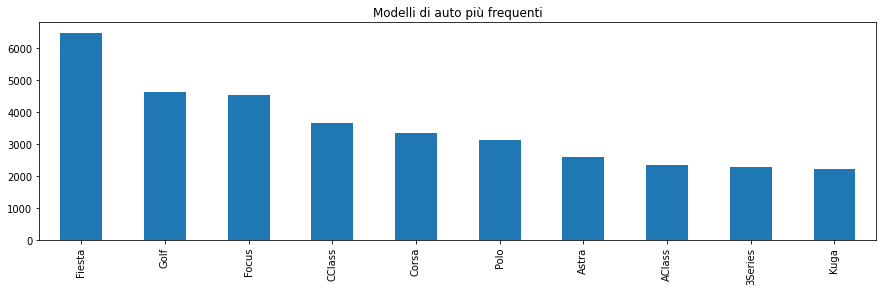

In [56]:
all_auto_plot_bar("model", 10, "Modelli di auto più frequenti")

Notiamo come la Fiesta abbia rubato il primo posto al Golf.

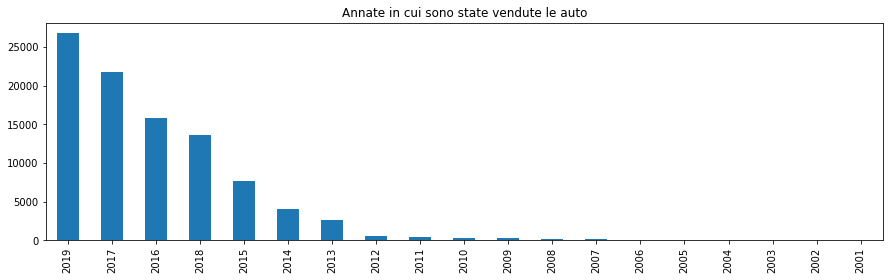

In [57]:
all_auto_plot_bar("year", 20, "Annate in cui sono state vendute le auto")

Come per il caso Volkswagen:
- Possiamo osservare che la maggior parte delle auto sono state vendute entro i primi 7/8 anni dalla data di acquisto.
- E quindi questo comporterà che il nostro modello potrebbe non essere molto affidabile su auto troppo vecchie.
- In precedenza per diminuire l'overfit abbiamo ridotto il dataset con annate che vanno dal 2000 al 2020, si potrebbe prendere in considerazione una prova con ulteriore diminuzione dal 2010 al 2020.

Confrontiamo il nuovo dataset(all_auto) con quello precedente(auto)

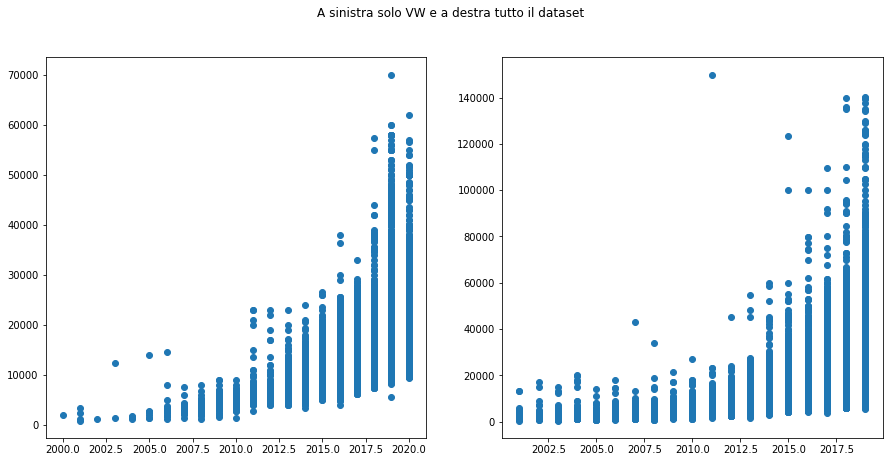

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('A sinistra solo VW e a destra tutto il dataset')
fig.set_size_inches(15, 7)
ax1.scatter(auto["year"], auto["price"])
ax2.scatter(all_auto["year"], all_auto["price"])

A differenza di prima qui il grafico è più altalenante.
- Questo è anche normale dato che ora stiamo rappresentando più case di produzione, le quali automobili hanno prezzi che oscillano differentemente col passare degli anni.
- Ovviamente aggiungendo case che producono auto più di "lusso/pregiate" abbiamo anche un prezzo massimo molto più elevato (circa 140000 rispetto a 60000).

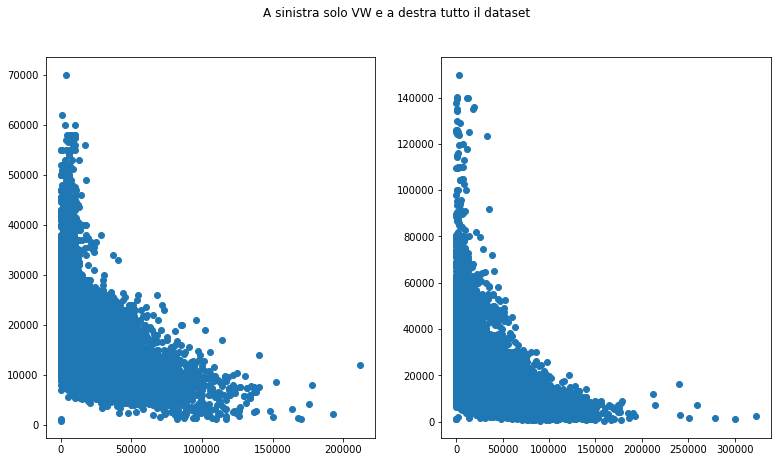

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('A sinistra solo VW e a destra tutto il dataset')
fig.set_size_inches(13, 7)
ax1.scatter(auto["mileage"], auto["price"])
ax2.scatter(all_auto["mileage"], all_auto["price"])

Possiamo invece notare che il rapporto tra chilometraggio e prezzo rimane tutto sommato invariato

##Preparazione dei dati

Ispezioniamo il dataset appena creato

In [65]:
all_auto["model"].value_counts().tail()

Ranger    1
200       1
RS7       1
220       1
180       1
Name: model, dtype: int64

- Come vediamo ci sono alcuni modelli di auto che sono presenti in numero veramente limitato (quasi inesistente). 
- Per ridurre la complessità del modello, oltre che diminuirne l'overfitting andiamo a rimuovere tutte le auto del dataset sotto le 300 unità.
- Creo quindi una lista di modelli che sono presenti nel dataset meno di 300 volte.

In [66]:
auto_to_remove = all_auto["model"].value_counts() < 300
auto_to_remove = auto_to_remove[auto_to_remove].index.values

- Prendo quindi tutte quelle da non rimuovere e sovvrascrivo il dataset

In [67]:
all_auto = all_auto[~all_auto["model"].isin(auto_to_remove)]
all_auto["model"].value_counts()

Fiesta     6469
Golf       4605
Focus      4534
CClass     3639
Corsa      3324
           ... 
B-MAX       355
Touran      342
Touareg     339
Kona        314
TT          313
Name: model, Length: 69, dtype: int64

Ottengo quindi un dataset in cui sono presenti solo 69 modelli di auto, rispetto alle 195 del dataset iniziale.

Come sopra andiamo a convertire le colonne "model", "transmission" e "fuelType" in categoriche.

In [68]:
all_auto["model"] = pd.Categorical(all_auto.model)
all_auto["transmission"] = pd.Categorical(all_auto.transmission)
all_auto["fuelType"] = pd.Categorical(all_auto.fuelType)
all_auto.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85263 entries, 0 to 10667
Columns: 7 entries, model to engineSize
dtypes: category(3), float64(1), int64(3)
memory usage: 3.5 MB


Come preprocessore posso utilizzare lo stesso di prima già presente nella variabile "preprocessor".

E sempre come prima vado a rimuovere il prezzo dalla X e divido il dataset in training_set e validation_set

In [69]:
full_y = all_auto["price"]
full_X = all_auto.drop(columns=["price"])

from sklearn.model_selection import train_test_split
full_X_train, full_X_val, full_y_train, full_y_val = train_test_split(full_X, full_y, test_size=1/3, random_state=50)

##Creazione dei modelli
Come in precedenza andiamo a creare 4 modelli diversi di regressione:
  1. Regressione Lineare
  2. Regressione con Lasso
  3. Regressione con Ridge
  4. Alberi Decisionali

**Regressione Lineare**

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

full_model_lin = Pipeline([
    ("preproc", preprocessor),
    ("regr", LinearRegression())
])
full_model_lin.fit(full_X_train, full_y_train)

kf = KFold(3, shuffle=True, random_state=40) #Controlla che sia corretta questa validazione
scores = cross_val_score(full_model_lin, full_X_val , full_y_val, cv=kf)
scores.mean()

0.8427544866150485

**Regressione Lasso**

In [71]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

full_model_lasso = Pipeline([
    ("preproc", preprocessor),
    ("regr", Lasso())
])
grid = {
    "regr__alpha": [1, 10, 50]
    }
full_gs_lasso = GridSearchCV(full_model_lasso, param_grid=grid, cv=kf)
full_gs_lasso.fit(full_X_train, full_y_train)

sel = ["rank_test_score","mean_test_score","params"]
pd.DataFrame(full_gs_lasso.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score               params
0                1         0.845261   {'regr__alpha': 1}
1                2         0.828673  {'regr__alpha': 10}
2                3         0.754498  {'regr__alpha': 50}

Come in precedenza, applicando la Lasso con un alpha abbastanza grande (10) si ottiene comunque un risultato molto buono.

Verifichiamo quante feature si azzerano.

In [72]:
full_model_lasso_2 = Pipeline([
    ("preproc", preprocessor),
    ("regr", Lasso(alpha=10))
])
full_model_lasso_2.fit(full_X_train, full_y_train)
full_model_lasso_2.score(full_X_val, full_y_val)

0.8244865787847099

In [73]:
all_features = pd.Series(full_model_lasso_2.named_steps["regr"].coef_).value_counts()
print("Feature totali: " + str(all_features.sum()))
print("Feature rimosse: " + str(all_features[all_features.index == 0].values[0]))

Feature totali: 81
Feature rimosse: 22


Otteniamo un modello con 22 feature in meno ma comunque abbastanza affidabile.

**Regressione Ridge**

In [74]:
from sklearn.linear_model import Ridge

full_model_ridge = Pipeline([
    ("preproc", preprocessor),
    ("regr", Ridge())
])

grid = {
    "regr__alpha": [1, 5, 10, 50]
}
full_gs_ridge = GridSearchCV(full_model_ridge, param_grid=grid, cv=kf)
full_gs_ridge.fit(full_X_train, full_y_train)

pd.DataFrame(full_gs_ridge.cv_results_).sort_values("mean_test_score", ascending=False)[sel]

rank_test_score  mean_test_score               params
0                1         0.845471   {'regr__alpha': 1}
1                2         0.845362   {'regr__alpha': 5}
2                3         0.845048  {'regr__alpha': 10}
3                4         0.839355  {'regr__alpha': 50}

- La regressione Ridge invece sembra mantenere punteggi molto simili al cambiare di alpha.
- Si sceglie di tenere come regressione ridge di riferimento quella con alpha pari a 10

In [75]:
full_model_ridge_2 = Pipeline([
    ("preproc", preprocessor),
    ("regr", Ridge(alpha=10))
])

full_model_ridge_2.fit(full_X_train, full_y_train)
full_model_ridge_2.score(full_X_val, full_y_val)

0.8425675496466981

In [76]:
all_features = pd.Series(full_model_ridge_2.named_steps["regr"].coef_).value_counts()
print("Feature totali: " + str(all_features.sum()))
print("Feature rimosse: " + str(all_features[all_features.index == 0].sum()))

Feature totali: 81
Feature rimosse: 0


Considerazioni finali:
- La natura della Ridge permette di alleggerire il modello mantenendo comunque in considerazione alcune feature meno rilevanti.
- Questo permette di ottenere un punteggio leggermente superiore rispetto a Lasso.
- Se prima si prevedeva che il tempo di fitting sarebbe stato elevato, se si provasse a aggiungere feature polinomiali ora il tempo di fitting del modello sarebbe intollerabile.
- Provando anche ad utilizzare il kernel trick i tempi sono comunque esagerati per via del numero di istanze di questo dataset ancora più elevato di prima.
- Come in precedenza, proviamo con un cambio di rotta, regressione con Alberi Decisionali

**Regressione con Alberi Decisionali**

In [78]:
from sklearn.tree import DecisionTreeRegressor

full_model_tree = Pipeline([
    ("preproc", preprocessor),
    ("regr",  DecisionTreeRegressor(random_state=50))
])
grid = {
    "regr__max_depth": [5, 10, 20, None],
    "regr__min_samples_split": [2, 0.02, 0.05, 0.1]
}

full_gs_tree = GridSearchCV(full_model_tree, grid, cv=kf)
full_gs_tree.fit(full_X_train, full_y_train)
pd.DataFrame(full_gs_tree.cv_results_).sort_values("mean_test_score", ascending=False)[sel].head()

rank_test_score  ...                                             params
8                 1  ...  {'regr__max_depth': 20, 'regr__min_samples_spl...
12                2  ...  {'regr__max_depth': None, 'regr__min_samples_s...
4                 3  ...  {'regr__max_depth': 10, 'regr__min_samples_spl...
13                4  ...  {'regr__max_depth': None, 'regr__min_samples_s...
9                 5  ...  {'regr__max_depth': 20, 'regr__min_samples_spl...

[5 rows x 3 columns]

In [79]:
full_gs_tree.best_params_

{'regr__max_depth': 20, 'regr__min_samples_split': 2}

Come prima il modello con Alberi Decisionali sembra molto promettente.

I tempi non sono istantanei ma comunque accettabili (circa 20 secondi)

Andremo poi ad analizzarlo più nello specifico.

##Valutazione dei modelli
Come in precedenza prendo in considerazione:
*   Modello Lineare
*   Modello con Ridge
*   Modello con Alberi Decisionali

Riutilizziamo la funzione di valutazione creata in precedenza (print_eval)

Visualizziamo quindi la valutazione dei modelli sia sul training set, sia sul validation set

In [81]:
print("Modello Lineare - Train")
print_eval(full_X_train, full_y_train, full_model_lin)
print("--------------------------------")
print("Modello Lineare - Val")
print_eval(full_X_val, full_y_val, full_model_lin)
print("================================")
print("Modello Ridge - Train")
print_eval(full_X_train, full_y_train, full_model_ridge_2)
print("--------------------------------")
print("Modello Ridge - Val")
print_eval(full_X_val, full_y_val, full_model_ridge_2)
print("================================")
print("Modello Alberi - Train")
print_eval(full_X_train, full_y_train, full_gs_tree)
print("--------------------------------")
print("Modello Alberi - Val")
print_eval(full_X_val, full_y_val, full_gs_tree)

Modello Lineare - Train
   Mean squared error: 1.0742e+07
       Relative error: 16.75913%
R-squared coefficient: 0.84592
--------------------------------
Modello Lineare - Val
   Mean squared error: 1.1166e+07
       Relative error: 16.57802%
R-squared coefficient: 0.843
Modello Ridge - Train
   Mean squared error: 1.0757e+07
       Relative error: 16.81515%
R-squared coefficient: 0.84571
--------------------------------
Modello Ridge - Val
   Mean squared error: 1.1197e+07
       Relative error: 16.64058%
R-squared coefficient: 0.84257
Modello Alberi - Train
   Mean squared error: 2.3331e+06
       Relative error: 5.94187%
R-squared coefficient: 0.96653
--------------------------------
Modello Alberi - Val
   Mean squared error: 6.3424e+06
       Relative error: 10.25873%
R-squared coefficient: 0.91082


Come si può notare dai test:
- La differenza tra la Ridge e la Lineare è pressoché inesistente.
- Il modello con Alberi decisionali è quello che ha il minor margine di errore e il maggior R-quadro.

##Il modello migliore

Come detto nella sezione precedente il modello migliore è quello basato sugli Alberi Decisionali, ma ci sono alcune considerazioni da fare:
- Si nota che il modello con Alberi decisionali è estremamente preciso sui dati di train mentre l'errore praticamente raddoppia sui dati di test (pur mantenendosi discretamente basso).
- Si prova quindi a diminuire la profondità così da diminuire l'overfit e vedere se si ottiene un modello più generico.

In [83]:
full_model_tree_2 = Pipeline([
    ("preproc", preprocessor),
    ("regr",  DecisionTreeRegressor(random_state=50, max_depth=10, min_samples_split=2))
])
full_model_tree_2.fit(full_X_train, full_y_train)

print("Modello Alberi - Train")
print_eval(full_X_train, full_y_train, full_model_tree_2)
print("--------------------------------")
print("Modello Alberi - Val")
print_eval(full_X_val, full_y_val, full_model_tree_2)

Modello Alberi - Train
   Mean squared error: 7.0035e+06
       Relative error: 12.83984%
R-squared coefficient: 0.89954
--------------------------------
Modello Alberi - Val
   Mean squared error: 8.8175e+06
       Relative error: 13.59600%
R-squared coefficient: 0.87602


Come vediamo il nuovo modello sulle istanze di train e su quelle di validation si comporta in maniera molto simile, perciò quest'ultimo modello è sicuramente più generico e stabile, ma i risultati sono leggermente minori (l'errore aumenta di circa un 3%)

Andiamo ora ad analizzare i 2 modelli così da chiarirci le idee su quale possa essere effettivamente il modello migliore.
- Confrontiamo il numero delle foglie.

In [84]:
print("Profondità: " + str(full_gs_tree.best_estimator_.named_steps["regr"].get_depth()))
print("Foglie: " + str(full_gs_tree.best_estimator_.named_steps["regr"].get_n_leaves()))

Profondità: 20
Foglie: 17322


In [85]:
print("Profondità: " + str(full_model_tree_2.named_steps["regr"].get_depth()))
print("Foglie: " + str(full_model_tree_2.named_steps["regr"].get_n_leaves()))

Profondità: 10
Foglie: 814


Ne consegue che:
- Il totale dei livelli dell'albero con profondità 20 sono ordini di grandezza superiori rispetto a quello con profondità pari a 10, ne comporta che il modello è estremamente più complesso.

Perciò nonostante l'albero con profondità 10 abbia un errore superiore lo si potrebbe comunque considerare il migliore in quanto è più generico e sopratutto molto meno complesso.

Analizziamo come ragiona il modello.
- Il numero di feature è aumentato quindi andiamo a riestrarle

In [86]:
full_cat_feature_names = (full_model_tree_2.named_steps['preproc']
                      .named_transformers_['categorical']
                      .get_feature_names(input_features=categorical_vars))
full_tree_feature_names = np.concatenate(
   [full_cat_feature_names, numeric_vars])

- Andiamo quindi a mostrare i nodi principali dell'albero

In [87]:
from sklearn.tree import export_text
print(export_text(full_model_tree_2.named_steps["regr"], feature_names=list(full_tree_feature_names), max_depth=3))

|--- fuelType_Diesel <= 0.50
|   |--- model_1Series <= 0.78
|   |   |--- model_3Series <= 0.66
|   |   |   |--- model_1Series <= -0.24
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_1Series >  -0.24
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- model_3Series >  0.66
|   |   |   |--- model_3Series <= 4.21
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_3Series >  4.21
|   |   |   |   |--- truncated branch of depth 7
|   |--- model_1Series >  0.78
|   |   |--- model_3Series <= 2.14
|   |   |   |--- model_3Series <= 0.56
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_3Series >  0.56
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- model_3Series >  2.14
|   |   |   |--- model_Auris <= 0.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- model_Auris >  0.50
|   |   |   |   |--- truncated branch of depth 6
|--- fuelType_Diesel >  0.50
|   |--- model_1Series <= 0.78
|   |  

- Si può notare come a differenza di prima ora prima di tutto l'albero va a suddividere in base al tipo di carburante e solo dopo in base al modello di auto.
- Direi che è comunque un comportamento corretto in quanto tendenzialmente le auto a Diesel mantengono un prezzo più alto all'aumentare dei chilometri.

##Conclusione

- Pur la vasta varietà di modelli e la grande differenza di prezzi tra un modello e l'altro si è riusciti a creare modelli che predicono i prezzi con un errore relativamente basso.
- Bisogna però considerare che i prezzi di auto sono generalmente molto elevati, quindi anche un errore relativamente basso potrebbe portare a grandi variazioni di prezzo (questo lo si evince bene osservando la varianza estremamente elevata).
- Nonostante ciò mi ritengo comunque molto soddisfatto del lavoro svolto.